In [2]:
import pandas as pd 
import numpy as np

In [3]:
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


(8790, 10)

In [5]:
#Treat Null Values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
#Treat Duplicates
data = data.drop_duplicates()

In [7]:
#Convert Date Column
data['date_added'] = pd.to_datetime(data['date_added'])
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [8]:
#Split Duration Column (Optional – Advanced)
data['Year_added'] = data['date_added'].dt.year
data['Month_added'] = data['date_added'].dt.month
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Year_added,Month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9


In [9]:
#Split Duration Column (Optional – Advanced)
data[['duration_value','duration_type']] = data['duration'].str.split(' ',expand = True)

In [10]:
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Year_added,Month_added,duration_value,duration_type
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,90,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,1,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,1,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,91,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,125,min


## Exploratory Data Analysis (EDA)

In [11]:
#Content Type Distribution
data['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

## Visualization

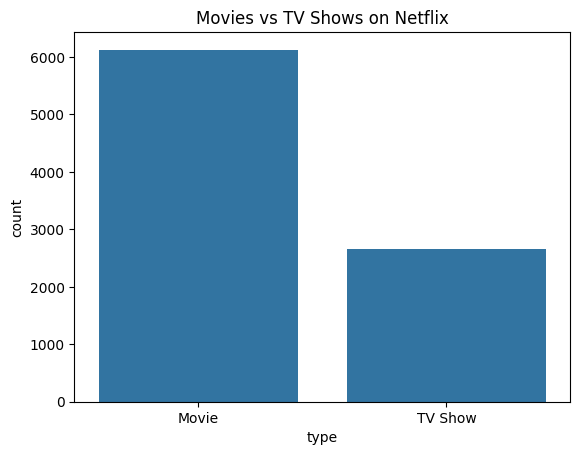

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='type',data=data)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

In [13]:

data['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

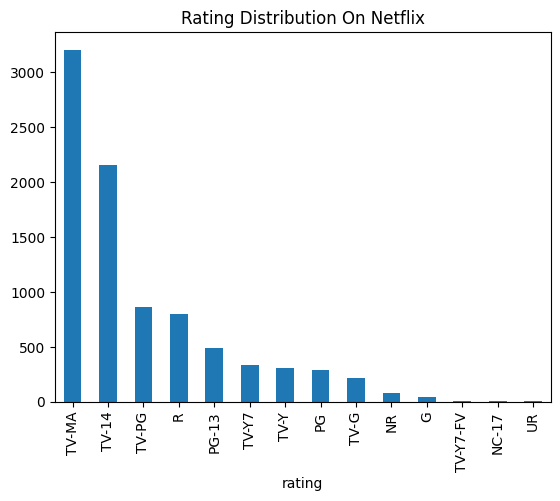

In [14]:
#rating distribution
data['rating'].value_counts().plot(kind = 'bar')
plt.title("Rating Distribution On Netflix")
plt.show()

In [15]:
#top 10 countries with contents 
top_country = data['country'].value_counts().head(10)

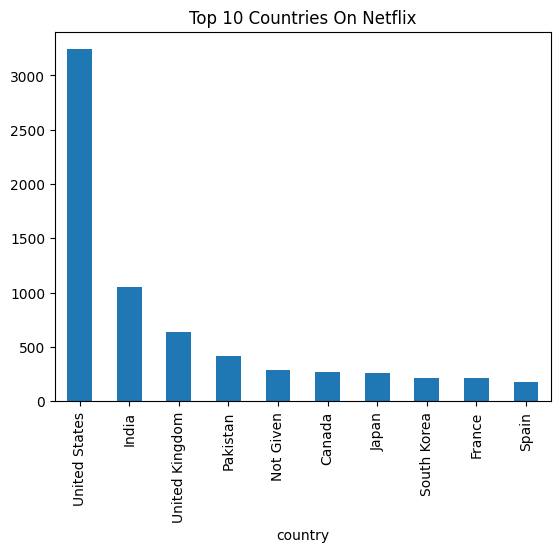

In [16]:
top_country.plot(kind = 'bar')
plt.title('Top 10 Countries On Netflix')
plt.show()

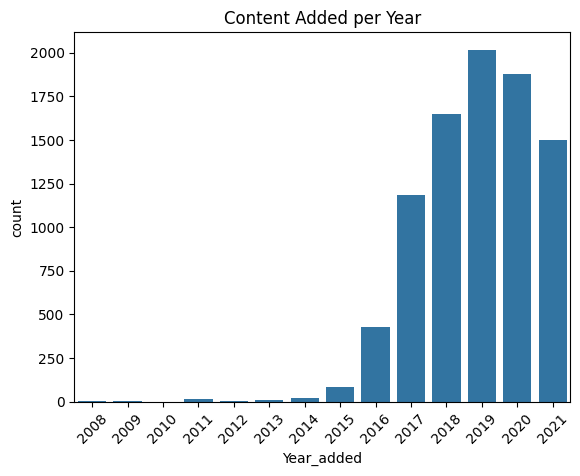

In [17]:
#Content Added Over Time
sns.countplot(x = 'Year_added',data=data)
plt.xticks(rotation = 45)
plt.title('Content Added per Year')
plt.show()

In [18]:
#Most Popular Genres
data['genres'] = data['listed_in'].str.split(', ')
genres = data.explode('genres')

genres['genres'].value_counts().head(10)

genres
International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

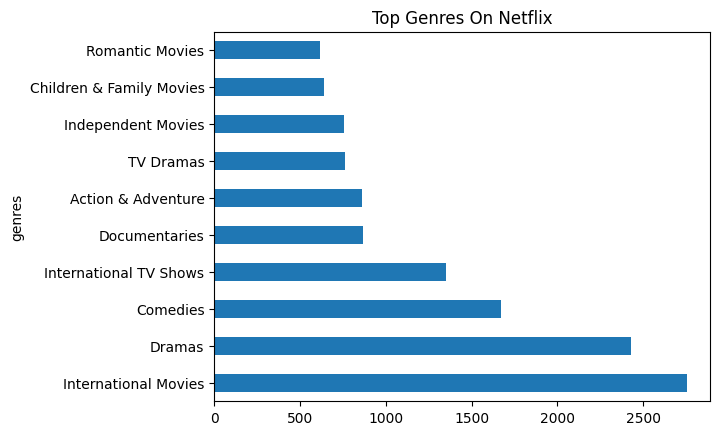

In [19]:
genres['genres'].value_counts().head(10).plot(kind = 'barh')
plt.title('Top Genres On Netflix')
plt.show()

In [20]:
#Top Directors
data['director'].value_counts().head(10)

director
Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Name: count, dtype: int64

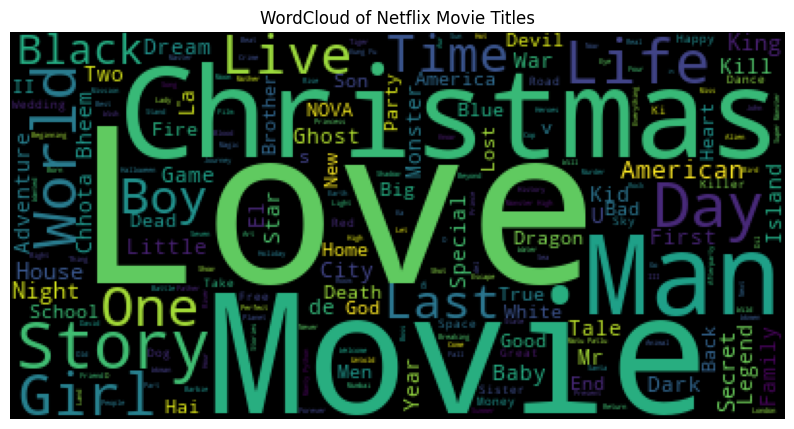

In [21]:
#WordCloud (Movies Titles)

from wordcloud import WordCloud

movie_titles = data[data['type'] == 'Movie']['title']
plt.figure(figsize=(10,6))
wordcloud = WordCloud(background_color = 'black').generate(' '.join(movie_titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("WordCloud of Netflix Movie Titles")
plt.show()

## Advanced Analysis 


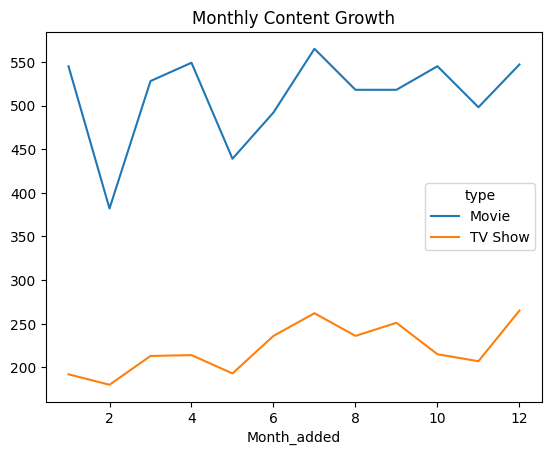

In [22]:
monthly = data.groupby(['Month_added','type']).size().unstack()
monthly.plot()
plt.title('Monthly Content Growth')
plt.show()

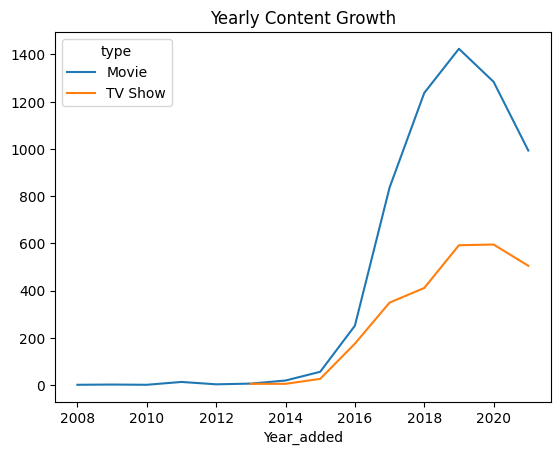

In [23]:
yearly = data.groupby(['Year_added','type']).size().unstack()
yearly.plot()
plt.title("Yearly Content Growth")
plt.show()

## Business Insights
### >Netflix has more Movies than TV Shows
### >Content growth increased rapidly after 2016
### >United States & India are top content producers
### >Most content is rated TV-MA
### >Peak content addition happens around July–September

In [24]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Year_added,Month_added,duration_value,duration_type,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,90,min,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,1,Season,"[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,1,Season,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,91,min,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,125,min,"[Dramas, Independent Movies, International Mov..."


In [64]:
data.to_csv('netflix_final.csv', index=False)

In [26]:
ml_data = data[['type', 'rating', 'release_year', 'Year_added']].dropna()
ml_data.head()


,type,rating,release_year,Year_added
0,Movie,PG-13,2020,2021
1,TV Show,TV-MA,2021,2021
2,TV Show,TV-MA,2021,2021
3,Movie,TV-PG,2021,2021
4,Movie,TV-MA,1993,2021


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

ml_data['type'] = le.fit_transform(ml_data['type'])
ml_data['rating'] = le.fit_transform(ml_data['rating'])

ml_data.head()


,type,rating,release_year,Year_added
0,0,4,2020,2021
1,1,8,2021,2021
2,1,8,2021,2021
3,0,9,2021,2021
4,0,8,1993,2021


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
ml_scaled = scaler.fit_transform(ml_data)


## Elbow Method + WCSS

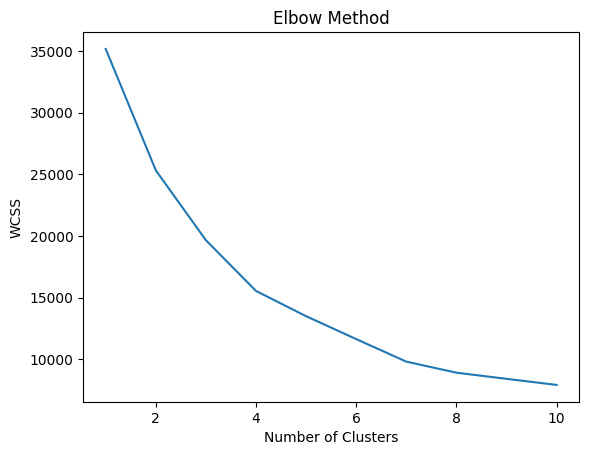

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(ml_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


## KMEANS

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)
ml_data['cluster'] = kmeans.fit_predict(ml_scaled)

ml_data.head()


,type,rating,release_year,Year_added,cluster
0,0,4,2020,2021,0
1,1,8,2021,2021,1
2,1,8,2021,2021,1
3,0,9,2021,2021,0
4,0,8,1993,2021,2


In [31]:
ml_data.groupby('cluster').mean()


,type,rating,release_year,Year_added
cluster,,,,
0,0.000000,6.901255,2016.079258,2018.789582
1,1.000000,7.884761,2016.980667,2018.935178
2,0.031902,4.969325,1992.711656,2019.224540


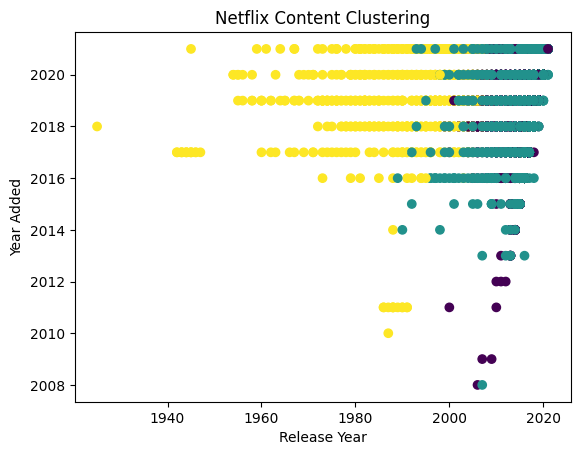

In [33]:
plt.scatter(
    ml_data['release_year'],
    ml_data['Year_added'],
    c=ml_data['cluster']
)
plt.xlabel("Release Year")
plt.ylabel("Year Added")
plt.title("Netflix Content Clustering")
plt.show()


In [34]:
data['cluster'] = ml_data['cluster']
data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,Year_added,Month_added,duration_value,duration_type,genres,cluster
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,90,min,[Documentaries],0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,1,Season,"[Crime TV Shows, International TV Shows, TV Ac...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,1,Season,"[TV Dramas, TV Horror, TV Mysteries]",1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,91,min,"[Children & Family Movies, Comedies]",0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,125,min,"[Dramas, Independent Movies, International Mov...",2


## Machine Learning Summary
### - Applied KMeans clustering (Unsupervised Learning)
### - Used content type, rating, and time-based features
### - Identified 3 distinct content clusters
### - Helped segment Netflix content based on patterns
